# Iris Flower Classification

## 1. Problem Definition
The Task is to classify the Iris flowers based on the given clinical parameters taken from the dataset

## 2. Data
* The Data was collected from Kaggle : " https://www.kaggle.com/datasets/arshid/iris-flower-dataset "
* The Dataset contains 3 classes of Iris species and 50 instances of each class
  

## 3. Evaluation 
The Evaluation will be based on the Accuracy score and chooses the highest accurate model for better classification

## 4. Features 
Based on the features and their dependence on each other classification task is perfomed.
There are 4 features :
1. Sepal Width
2. Sepal Length
3. Petal Width
4. Petal Length

### Importing Modules and Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv("Iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
len(df)

150

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# No.of Species of Each class
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
# Check of null values 
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Exploratory Data Analysis

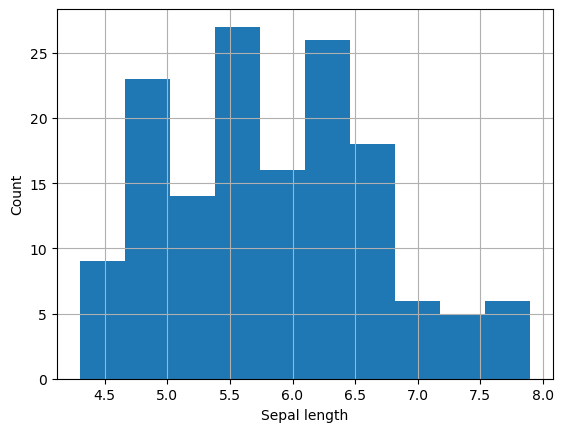

In [9]:
df["sepal_length"].hist()
plt.xlabel("Sepal length")
plt.ylabel("Count");

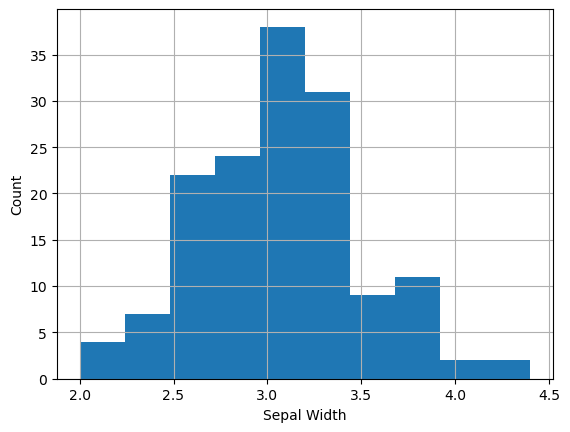

In [10]:
df["sepal_width"].hist()
plt.xlabel("Sepal Width")
plt.ylabel("Count");

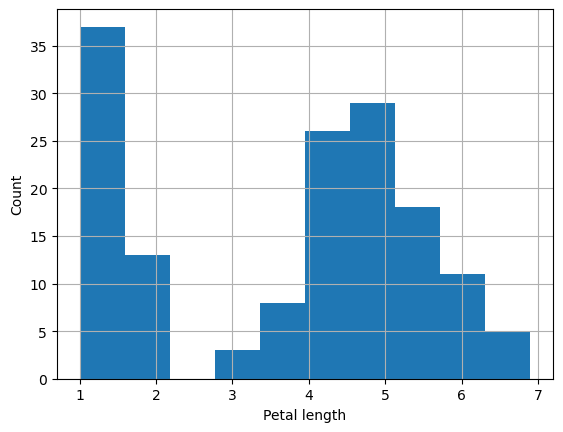

In [11]:
df["petal_length"].hist()
plt.xlabel("Petal length")
plt.ylabel("Count");

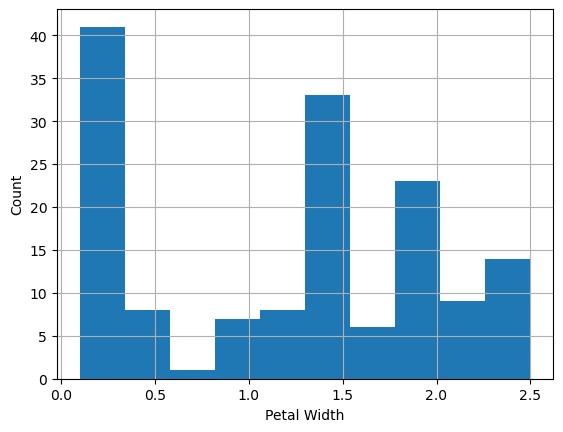

In [12]:
df["petal_width"].hist()
plt.xlabel("Petal Width")
plt.ylabel("Count");

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

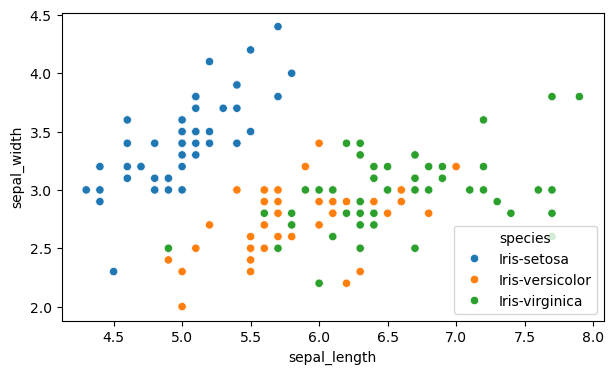

In [13]:
fig,ax=plt.subplots(figsize=(7,4))
sns.scatterplot(x="sepal_length", y="sepal_width", data=df ,hue="species")
#ax.scatter(df["sepal_length"],df["sepal_width"])

<Axes: xlabel='petal_length', ylabel='petal_width'>

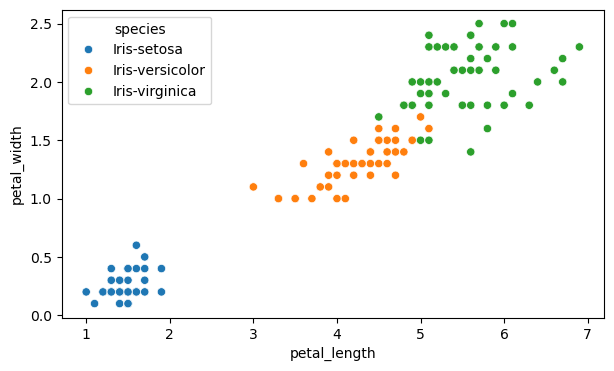

In [14]:
fig,ax=plt.subplots(figsize=(7,4))
sns.scatterplot(x="petal_length", y="petal_width", data=df ,hue="species")

<Axes: xlabel='sepal_length', ylabel='petal_length'>

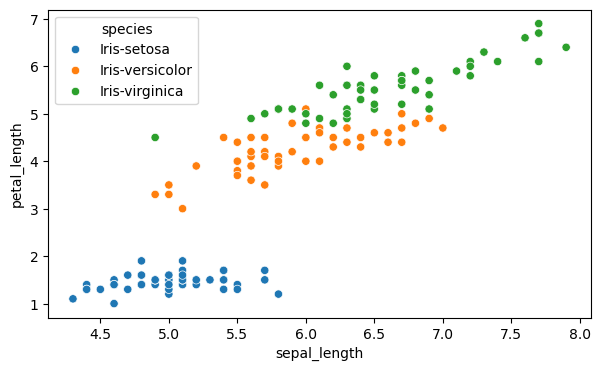

In [15]:
fig,ax=plt.subplots(figsize=(7,4))
sns.scatterplot(x="sepal_length", y="petal_length", data=df ,hue="species")

<Axes: xlabel='sepal_width', ylabel='petal_width'>

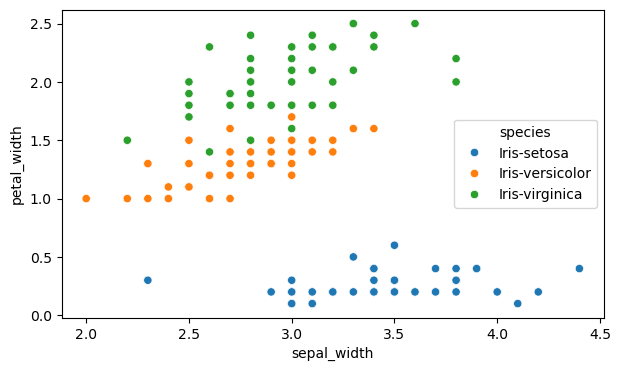

In [16]:
fig,ax=plt.subplots(figsize=(7,4))
sns.scatterplot(x="sepal_width", y="petal_width", data=df ,hue="species")

#### From the Exploratory Data Analysis one class which is Iris Setosa can be easily seperated from the other 2 classes in all the features like sepal 

#### length,sepal width,petal length, petal width.

### Correlation Matrix

In [17]:
corr=df.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

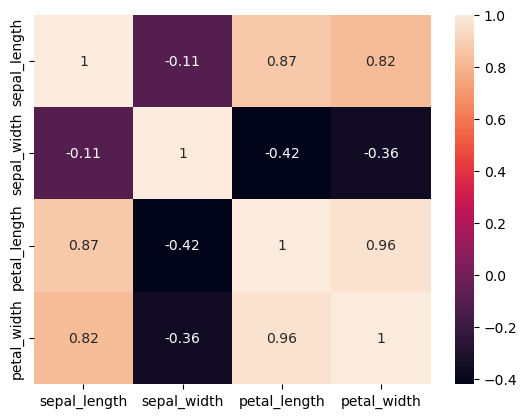

In [18]:
# Plotting the heatmap
sns.heatmap(corr,annot=True)

### Model Training and Choosing the Best Fit Model

In [19]:
# Importing classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
from sklearn.model_selection import train_test_split
X=df.drop(columns="species")
y=df["species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print("Length of Training Data :")
len(X_train),len(y_train)

Length of Training Data :


(105, 105)

In [30]:
print("Length of Testing dataset :")
len(X_test),len(y_test)

Length of Testing dataset :


(45, 45)

In [31]:
# 1. Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [32]:
print("Accuracy of Logistic Regression :",model.score(X_test,y_test))

Accuracy of Logistic Regression : 0.9777777777777777


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_pred,y_test))

[[14  0  0]
 [ 0 18  1]
 [ 0  0 12]]


In [35]:
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.95      0.97        19
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [42]:
# 2.KNeighbours Classifier
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
print("Accuracy Of KNeighbors Classifier :",model2.score(X_test,y_test))

Accuracy Of KNeighbors Classifier : 0.9555555555555556


In [52]:
y_pred2 = model2.predict(X_test)
print(confusion_matrix(y_pred2,y_test))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [53]:
print(classification_report(y_pred2,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [54]:
# 3.DecisionTree Classifier
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)
print("Accuracy of Decision Tree Classifier : ",model3.score(X_test,y_test))

Accuracy of Decision Tree Classifier :  0.8666666666666667


In [55]:
y_pred3 = model3.predict(X_test)
print(confusion_matrix(y_pred3,y_test))

[[14  0  0]
 [ 0 16  4]
 [ 0  2  9]]


In [56]:
print(classification_report(y_pred3,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.80      0.84        20
 Iris-virginica       0.69      0.82      0.75        11

       accuracy                           0.87        45
      macro avg       0.86      0.87      0.86        45
   weighted avg       0.88      0.87      0.87        45



#### Therefore, Logistic Regreession is the best fit model for the Iris Flower Classification

### Hyperparameter Tuning by RandomizedSearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# Creating a hyperparamter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}
# Tuning logistic regression model
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [66]:
rs_log_reg.score(X_test,y_test)

0.9777777777777777

The Accuracy Remains same. So 97.77 % is the maximum accuracy we can get from the model Logistic Regression  

In [72]:
new_data =pd.DataFrame({"sepal_length":[3.3],
                         "sepal_width":[1.0],
                         "petal_length":[0.4],
                         "petal_width":[0.2]})
predflwr = model.predict(new_data)

In [73]:
print("Predicted Iris Class :",predflwr)

Predicted Iris Class : ['Iris-setosa']
